In [1]:
import pandas as pd
import numpy as np

In [5]:
# ---- import the raw dataset

df = pd.read_csv('relabelled_normie.csv')

print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1816 entries, 0 to 1815
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Pattern String  1816 non-null   object
 1   classification  1816 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 28.5+ KB
None


In [7]:
df

,Pattern String,classification
0,FREE SHIPPING ON ORDERS OVER $100!,1
1,SOME EXCLUSIONS APPLY - LEARN MORE,1
2,HAVE A QUESTION? - CONTACT US,1
3,WELCOME TO 034MOTORSPORT!,1
4,SHOP AUDISHOP VOLKSWAGENPERFORMANCE SOFTWARE03...,1
...,...,...
1811,Antique Vibrator Museum,1
1812,GiVe Donation Program,1
1813,Jobs,1
1814,©-2019 Barnaby Ltd dba Good Vibrations,1


In [8]:
# check the final distribution of the classification after removing the rows with NULL values and duplicates.

print(df['classification'].value_counts())

1    1815
0       1
Name: classification, dtype: int64


In [9]:
# remove the instances with NULL value of 'Pattern String' and 'classification', which will be the input of our model.

df = df[pd.notnull(df["Pattern String"])]
df = df[pd.notnull(df["classification"])]

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1816 entries, 0 to 1815
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Pattern String  1816 non-null   object
 1   classification  1816 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 42.6+ KB


In [20]:
 # For later training the model, we should remove the duplicate input to reduce overfitting.

no_dark = df.drop_duplicates(subset="Pattern String")

no_dark.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1816 entries, 0 to 1815
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Pattern String  1816 non-null   object
 1   classification  1816 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 42.6+ KB


In [11]:
# add the princeton dataset to enrich the dark tags
princeton = pd.read_csv('dark_patterns.csv')

print('Information of original princeton dataset: ',princeton.info())

# remove the rows where there are NULL values in 'Pattern String' or 'Pattern Category' columns.

princeton = princeton[pd.notnull(princeton["Pattern String"])]
princeton = princeton[pd.notnull(princeton["Pattern Category"])]

print('Information of princeton dataset aftering removing NA value in content and category: ',princeton.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1818 entries, 0 to 1817
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Pattern String     1512 non-null   object
 1   Comment            1798 non-null   object
 2   Pattern Category   1818 non-null   object
 3   Pattern Type       1818 non-null   object
 4   Where in website?  1818 non-null   object
 5   Deceptive?         1818 non-null   object
 6   Website Page       1818 non-null   object
dtypes: object(7)
memory usage: 99.5+ KB
Information of original princeton dataset:  None
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1512 entries, 0 to 1817
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Pattern String     1512 non-null   object
 1   Comment            1494 non-null   object
 2   Pattern Category   1512 non-null   object
 3   Pattern Type       1512 non-null   

In [12]:
# create a column named 'classification' and give all the values to be 1, which means 'Dark', to match with the presence dataset.

princeton["classification"] = 0

# For later training the model, we should remove the duplicate input to reduce overfitting.

princeton = princeton.drop_duplicates(subset="Pattern String")

print('Information of princeton dataset aftering removing duplicates in content: ',princeton.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1178 entries, 0 to 1817
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Pattern String     1178 non-null   object
 1   Comment            1162 non-null   object
 2   Pattern Category   1178 non-null   object
 3   Pattern Type       1178 non-null   object
 4   Where in website?  1178 non-null   object
 5   Deceptive?         1178 non-null   object
 6   Website Page       1178 non-null   object
 7   classification     1178 non-null   int64 
dtypes: int64(1), object(7)
memory usage: 82.8+ KB
Information of princeton dataset aftering removing duplicates in content:  None


In [19]:
# Check the distribution of dark pattern category (big) and dark pattern type (small)

print('Pattern Category:\n{}'.format(princeton['Pattern Category'].value_counts()))

print('Pattern Type:\n{}'.format(princeton['Pattern Type'].value_counts()))

Pattern Category:
Scarcity         418
Social Proof     312
Urgency          210
Misdirection     195
Obstruction       27
Sneaking          12
Forced Action      4
Name: Pattern Category, dtype: int64
Pattern Type:
Low-stock Message                   395
Activity Notification               311
Confirmshaming                      129
Countdown Timer                     129
Limited-time Message                 81
Pressured Selling                    45
Hard to Cancel                       27
High-demand Message                  23
Visual Interference                  12
Trick Questions                       9
Hidden Subscription                   6
Forced Enrollment                     4
Sneak into Basket                     3
Hidden Costs                          3
Testimonials of Uncertain Origin      1
Name: Pattern Type, dtype: int64


In [18]:
# Keep only the five types of dark patterns to be training models in the princeton dataset

pattern_list = ['Activity Notification','Low-stock Message','Countdown Timer','Limited-time Message','High-demand Message']

Five_Types_dark = princeton[princeton['Pattern Type'].isin(pattern_list)]

print('Information of the filterted dark pattern dataset with 5 types of dark pattern types:\n',Five_Types_dark.info())

print('Distribution of dark pattern types:\n{}'.format(Five_Types_dark['Pattern Type'].value_counts()))

<class 'pandas.core.frame.DataFrame'>
Int64Index: 939 entries, 0 to 1697
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Pattern String     939 non-null    object
 1   Comment            930 non-null    object
 2   Pattern Category   939 non-null    object
 3   Pattern Type       939 non-null    object
 4   Where in website?  939 non-null    object
 5   Deceptive?         939 non-null    object
 6   Website Page       939 non-null    object
 7   classification     939 non-null    int64 
dtypes: int64(1), object(7)
memory usage: 66.0+ KB
Information of the filterted dark pattern dataset with 5 types of dark pattern types:
 None
Distribution of dark pattern types:
Low-stock Message        395
Activity Notification    311
Countdown Timer          129
Limited-time Message      81
High-demand Message       23
Name: Pattern Type, dtype: int64


In [31]:
# Check the length of content in dark pattern dataset

dark_length = Five_Types_dark['Pattern String'].str.len()

print('The minimal string length of dark pattern content in the dataset:\n{}'.format(dark_length.min()))

print('The maximal string length of dark pattern content in the dataset:\n{}'.format(dark_length.max()))

# Check the word number count of the content in dark pattern dataset

Five_Types_dark['words number'] = Five_Types_dark['Pattern String'].str.split().str.len()

print('The minimal word count of dark pattern content in the dataset:\n{}'.format(Five_Types_dark['words number'].min()))

print('The maximal word count of dark pattern content in the dataset:\n{}'.format(Five_Types_dark['words number'].max()))

The minimal string length of dark pattern content in the dataset:
6
The maximal string length of dark pattern content in the dataset:
185
The minimal word count of dark pattern content in the dataset:
1
The maximal word count of dark pattern content in the dataset:
30


<ipython-input-31-4ebc1f3947dd>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Five_Types_dark['words number'] = Five_Types_dark['Pattern String'].str.split().str.len()


<AxesSubplot:>

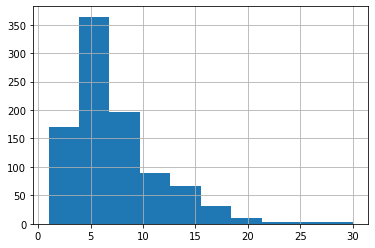

In [32]:
# Visualisations of the word count in dark pattern dataset

Five_Types_dark['words number'].hist()

In [33]:
# Check the length of content in no_dark pattern dataset

no_dark_length = no_dark['Pattern String'].str.len()

print('The minimal string length of no_dark pattern content in the dataset:\n{}'.format(no_dark_length.min()))

print('The maximal string length of no_dark pattern content in the dataset:\n{}'.format(no_dark_length.max()))

# Check the word number count of the content in dark pattern dataset

no_dark['words number'] = no_dark['Pattern String'].str.split().str.len()

print('The minimal word count of no_dark pattern content in the dataset:\n{}'.format(no_dark['words number'].min()))

print('The maximal word count of no_dark pattern content in the dataset:\n{}'.format(no_dark['words number'].max()))

The minimal string length of no_dark pattern content in the dataset:
1
The maximal string length of no_dark pattern content in the dataset:
726
The minimal word count of no_dark pattern content in the dataset:
0
The maximal word count of no_dark pattern content in the dataset:
110


<AxesSubplot:>

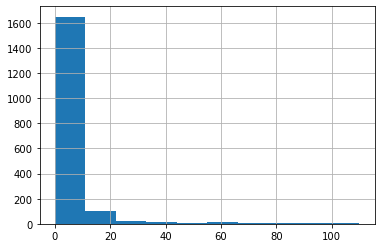

In [34]:
# Visualisations of the word count in dark pattern dataset

no_dark['words number'].hist()

In [35]:
# Filter the no_dark datatset into word count from 2 to 30 (included)

filter_no_dark = no_dark[(no_dark['words number']>1) & (no_dark['words number']<31)]

print('The information of the no_dark dataset aftering filtering word count:\n{}'.format(filter_no_dark.info()))

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1302 entries, 0 to 1815
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Pattern String  1302 non-null   object
 1   classification  1302 non-null   int64 
 2   words number    1302 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 40.7+ KB
The information of the no_dark dataset aftering filtering word count:
None


In [37]:
# Check the word number count of the content in dark pattern dataset

print('The minimal word count of filtered no_dark pattern content in the dataset:\n{}'.format(filter_no_dark['words number'].min()))

print('The maximal word count of filtered no_dark pattern content in the dataset:\n{}'.format(filter_no_dark['words number'].max()))

The minimal word count of filtered no_dark pattern content in the dataset:
2
The maximal word count of filtered no_dark pattern content in the dataset:
30


<AxesSubplot:>

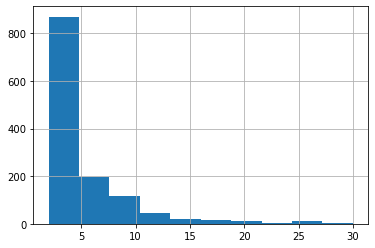

In [36]:
# Visualisations of the word count in dark pattern dataset

filter_no_dark['words number'].hist()

In [38]:
# Subset the filtered dataset for joining with raw presence dataset.

cols = ["Pattern String", "classification"]
filtered_dark = Five_Types_dark[cols]
filtered_no_dark = filter_no_dark[cols]

five_types_train_data = pd.concat([filtered_no_dark, filtered_dark])

print(five_types_train_data['classification'].value_counts())

1    1301
0     940
Name: classification, dtype: int64


In [40]:
five_types_train_data.to_csv('five_types_train_data.csv', index = False, header = True)